## SALES PREDICTION USING PYTHON

Sales prediction with Python enables businesses to forecast future sales based on factors like advertising expenses, customer segmentation, and marketing platforms. Leveraging machine learning techniques, companies can analyze historical data, build predictive models, and make data-driven decisions to optimize marketing strategies, allocate resources efficiently, and maximize revenue potential. By continuously updating the models with new data, businesses can adapt to market dynamics and achieve better performance in a competitive environment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [5]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Dropping the unnecessary column Unnamed: 0 from the dataframe

In [8]:
df=df.iloc[:,1:]

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.shape

(200, 4)

### Statistical information of dataset

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Checking for null values

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Checking for duplicates

In [16]:
df.duplicated().sum()

0

### Check for the correlation

In [20]:
corr=df.corr()

<AxesSubplot: >

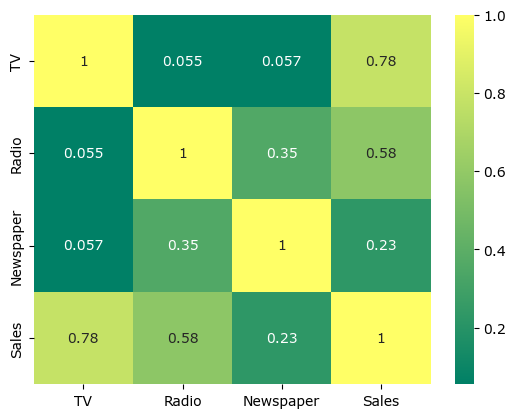

In [24]:
sns.heatmap(corr,annot=True,cmap='summer')

### Insights

#### - Advertising thru TV is 78% correlated with sales
#### - Advertising thru Radio is 58% correlated with sales
#### - Advertising thru Newspaper is 23% least correlated with sales  

<AxesSubplot: xlabel='Sales', ylabel='Count'>

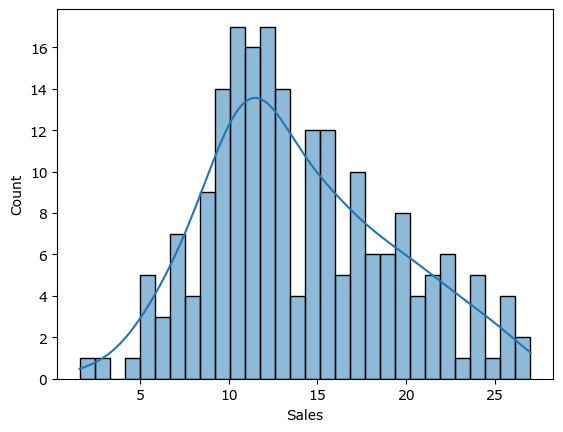

In [27]:
sns.histplot(data=df,x='Sales',bins=30,kde=True)

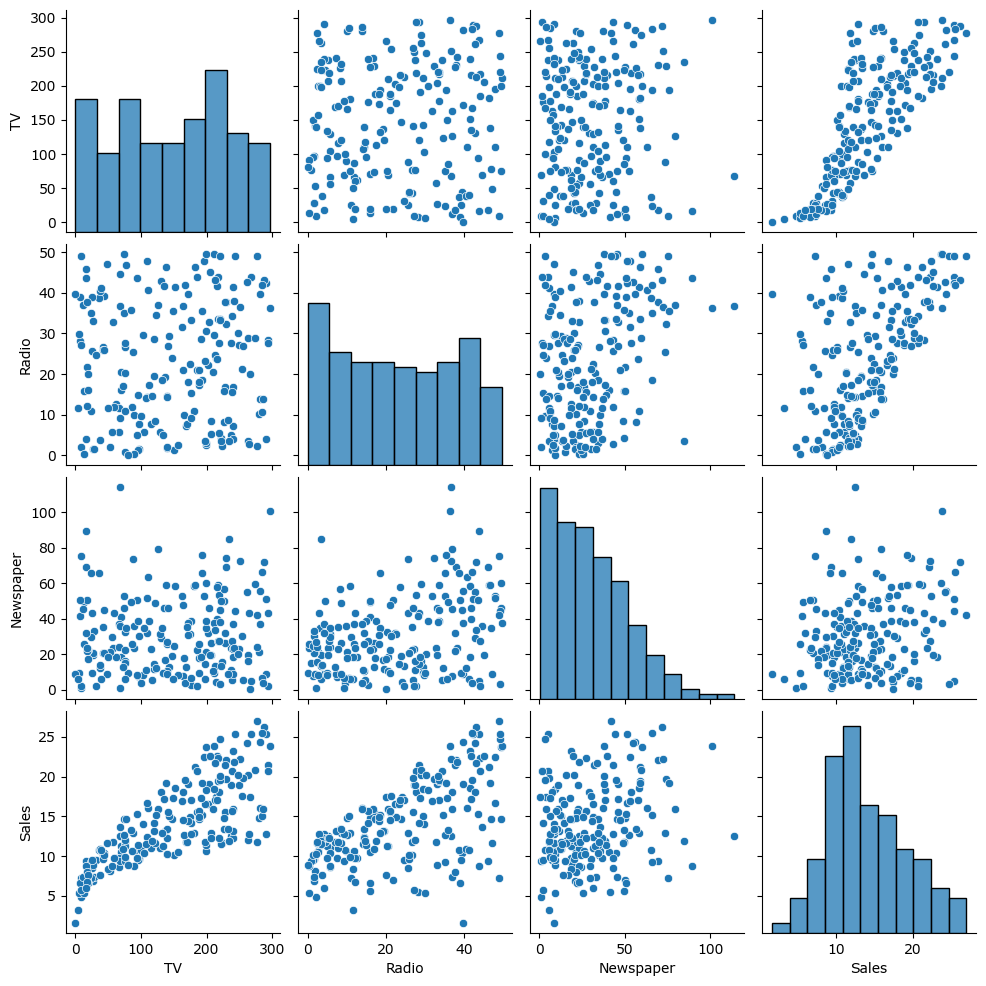

In [28]:
sns.pairplot(df)

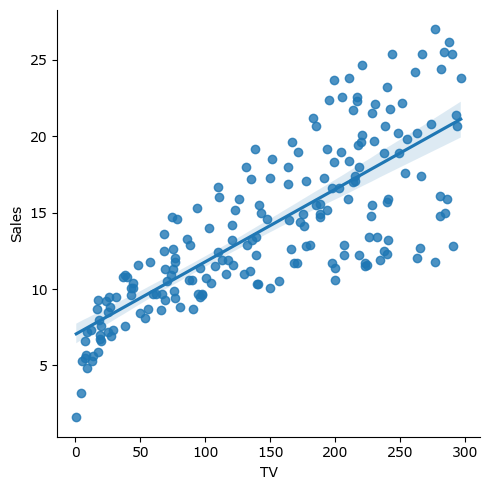

In [49]:
sns.lmplot(x='TV',y='Sales',data=df)

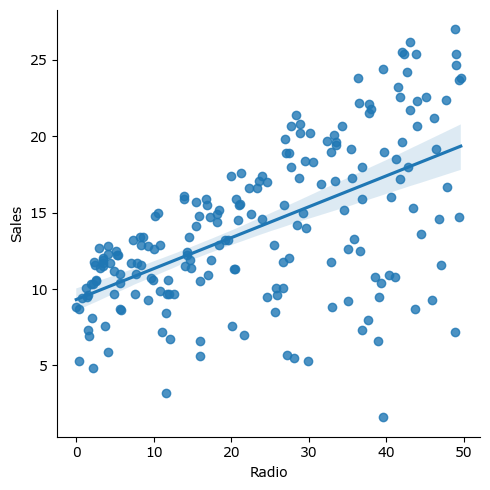

In [51]:
sns.lmplot(x='Radio',y='Sales',data=df)

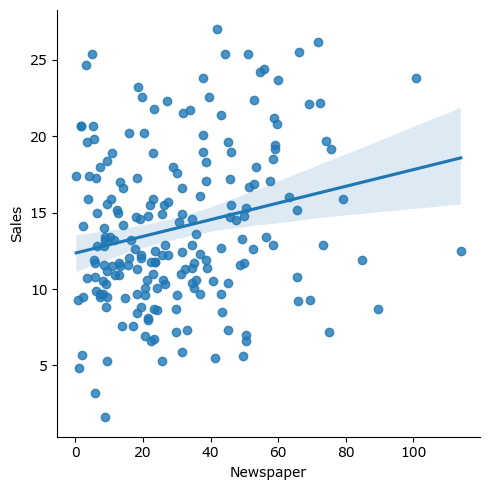

In [52]:
sns.lmplot(x='Newspaper',y='Sales',data=df)

In [35]:
X=df[['TV','Radio','Newspaper']]

In [36]:
y=df[['Sales']]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=.2)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

### Using Linear, Lasso, Ridge Regression and Random Forest Regressor models

In [44]:
models = {
        'LinearRegression': LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'RandomForestRegressor':RandomForestRegressor()
}

In [45]:
from sklearn.metrics import r2_score

In [46]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        
        y_pred=model.predict(X_test)
        
        test_model_score=r2_score(y_test,y_pred)
        report[list(models.keys())[i]]=test_model_score
    return report

In [47]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'LinearRegression': 0.7575894500772721,
 'Lasso': 0.7521778644886356,
 'Ridge': 0.7575798054330484,
 'RandomForestRegressor': 0.9744335187944679}

### Insights
#### - Random Forest Regressor has the highest accuracy with 97.4%